In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. Simulating Historical Disease Spread Data

# Simulated initial conditions for the SIR model
N = 10000  # Total population
I0 = 1  # Initial number of infected individuals
R0 = 0  # Initial number of recovered individuals
S0 = N - I0 - R0  # Initial number of susceptible individuals
beta = 0.3  # Rate of infection (probability of contact that results in disease spread)
gamma = 0.1  # Recovery rate (probability of recovery)

# Time points
t = np.linspace(0, 160, 160)  # simulate for 160 days

# SIR model differential equations.
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over time grid
solution = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = solution.T  # Transpose to extract S, I, and R

# Create a dataframe to hold the data
df = pd.DataFrame({
    'Day': t,
    'Susceptible': S,
    'Infected': I,
    'Recovered': R
})
df

,Day,Susceptible,Infected,Recovered
0,0.000000,9999.000000,1.000000,0.000000
1,1.006289,9998.665635,1.222897,0.111468
2,2.012579,9998.256758,1.495461,0.247781
3,3.018868,9997.756775,1.828749,0.414476
4,4.025157,9997.145402,2.236280,0.618319
...,...,...,...,...
155,155.974843,595.361319,1.065731,9403.572950
156,156.981132,595.342935,0.981184,9403.675881
157,157.987421,595.326010,0.903344,9403.770646
158,158.993711,595.310428,0.831679,9403.857893


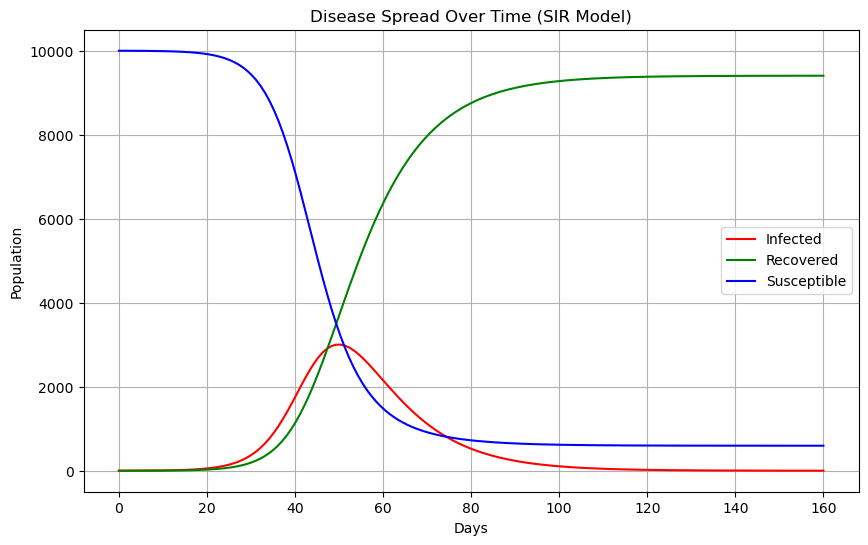

In [2]:
# Plot the disease spread (SIR model)
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Infected'], label='Infected', color='red')
plt.plot(df['Day'], df['Recovered'], label='Recovered', color='green')
plt.plot(df['Day'], df['Susceptible'], label='Susceptible', color='blue')
plt.title('Disease Spread Over Time (SIR Model)')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

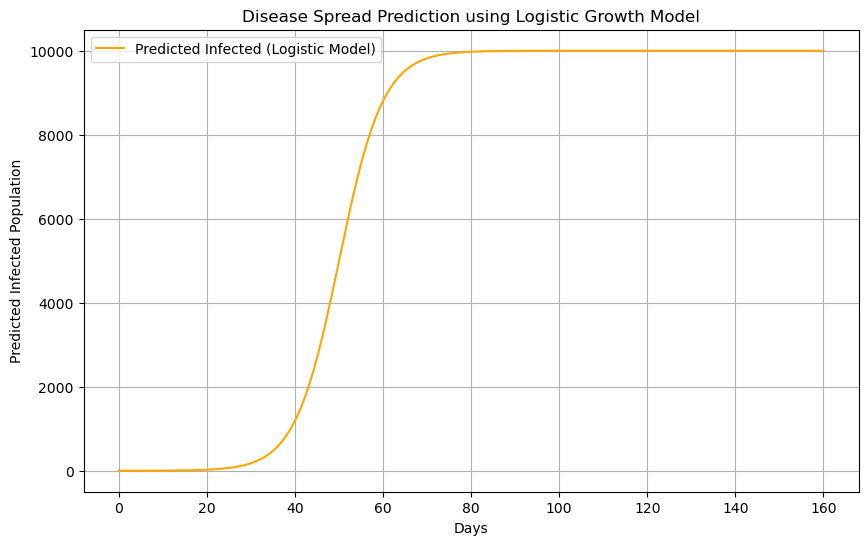

In [3]:
# 2. Logistic Growth Model for Disease Spread

# Using logistic growth model: P(t) = K / (1 + exp(-r*(t-t0)))
# Where:
# - P(t) is the population at time t
# - K is the carrying capacity (max population infected)
# - r is the growth rate
# - t0 is the time at which growth rate is highest

# Parameters for the logistic growth model
K = N  # Maximum possible number of infected individuals (carrying capacity)
r = 0.2  # Growth rate
t0 = 50  # Midpoint of the infection spread

# Logistic growth function
def logistic_growth(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Predict disease spread using the logistic growth model
predicted_infected = logistic_growth(t, K, r, t0)

# Plot the logistic growth prediction
plt.figure(figsize=(10, 6))
plt.plot(t, predicted_infected, label='Predicted Infected (Logistic Model)', color='orange')
plt.title('Disease Spread Prediction using Logistic Growth Model')
plt.xlabel('Days')
plt.ylabel('Predicted Infected Population')
plt.legend()
plt.grid(True)
plt.show()

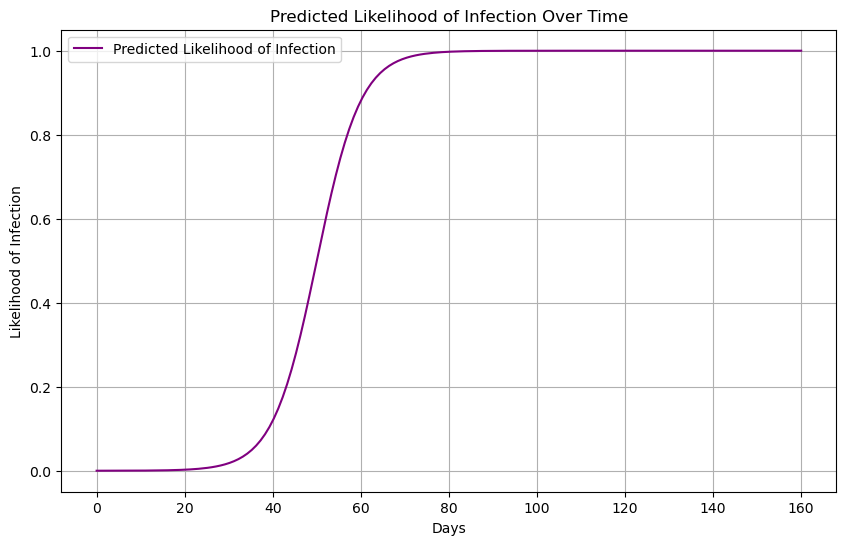

In [4]:
# 3. Predict the likelihood of disease spread (probability)
# Using the logistic growth model's output to estimate the likelihood of infection
predicted_likelihood = predicted_infected / N  # Probability of being infected at each time step

# Plot the likelihood of disease spread
plt.figure(figsize=(10, 6))
plt.plot(t, predicted_likelihood, label='Predicted Likelihood of Infection', color='purple')
plt.title('Predicted Likelihood of Infection Over Time')
plt.xlabel('Days')
plt.ylabel('Likelihood of Infection')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# 4. Statistical Model - Estimate probability of disease spread using historical data

# For simplicity, let's estimate the likelihood of infection at a particular day (e.g., Day 50)
day_50_likelihood = predicted_likelihood[np.argmax(t == 50)]
print(f"Likelihood of infection on Day 50: {day_50_likelihood:.4f}")

Likelihood of infection on Day 50: 0.0000
